In [3]:
import pandas as pd
import os
from sklearn import preprocessing
import time
seconds = time.time()
%matplotlib inline

number="0123456789"
# CSV files names:
csv_files=["Monday-WorkingHours.pcap_ISCX",
        "Tuesday-WorkingHours.pcap_ISCX",
        "Wednesday-workingHours.pcap_ISCX",
        "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX",
        "Friday-WorkingHours-Morning.pcap_ISCX",
        "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX",
        "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX",]

# Headers of column 
main_labels=["Flow ID","Source IP","Source Port","Destination IP","Destination Port","Protocol","Timestamp","Flow Duration","Total Fwd Packets",
   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","faulty-Fwd Header Length","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min","Idle Mean","Idle Std","Idle Max","Idle Min","Label","External IP"]

main_labels2=main_labels
main_labels=( ",".join( i for i in main_labels ) )
main_labels=main_labels+"\n"
flag=True

# CSV File Processing Loop:

In [4]:
for i in range(len(csv_files)):
    ths = open(str(i)+".csv", "w")
    ths.write(main_labels)
    with open(csv_files[i]+".csv", "r") as file:
        while True:
            try:
                line=file.readline()
                if  line[0] in number:# this line eliminates the headers of CSV files and incomplete streams .
                    if " – " in str(line): ##  if there is "–" character ("–", Unicode code:8211) in the flow ,  it will be chanced with "-" character ( Unicode code:45).
                        line=(str(line).replace(" – "," - "))
                    line=(str(line).replace("inf","0"))
                    line=(str(line).replace("Infinity","0"))
                    line=(str(line).replace("NaN","0"))
                     
                    ths.write(str(line))
                else:
                    continue                       
            except:
                break
    ths.close()
 
 
    df=pd.read_csv(str(i)+".csv",low_memory=False)
    df=df.fillna(0)

    string_features=["Flow Bytes/s","Flow Packets/s"]
    for ii in string_features: #Some data in the "Flow Bytes / s" and "Flow Packets / s" columns are not numeric. Fixing this bug in this loop
        df[ii]=df[ii].replace('Infinity', -1)
        df[ii]=df[ii].replace('NaN', 0)
        number_or_not=[]
        for iii in df[ii]:
            try:
                k=int(float(iii))
                number_or_not.append(int(k))
            except:
                number_or_not.append(iii)
        df[ii]=number_or_not



    string_features=[]
    for j in main_labels2: # In this section, non-numeric (string and / or categorical) properties (columns) are detected.
        if df[j].dtype=="object":
            string_features.append(j)
    try:
        string_features.remove('Label')#The "Label" property was removed from the list. Because it has to remain "categorical" for using with different machine learning approach.
    except:
        print("error!")
    labelencoder_X = preprocessing.LabelEncoder()



    for ii in string_features: ## In this loop, non-numeric (string and/or categorical) properties converted to numeric features.
        try:
            df[ii]=labelencoder_X.fit_transform(df[ii])
        except:
            df[ii]=df[ii].replace('Infinity', -1)
    df=df.drop(main_labels2[61], axis=1) ## Column 61 is deleted because it is unnecessary, column 41 ("Fwd Header Length" feature) had be mistakenly rewritten.



    ##All CSV files are merged into a single file.
    if flag:
        df.to_csv('all_data.csv' ,index = False)
        flag=False
    else:
        df.to_csv('all_data.csv' ,index = False,header=False,mode="a")
    os.remove(str(i)+".csv")
    print("The pre-processing phase of the ",csv_files[i]," file is completed.\n")
   


The pre-processing phase of the  Monday-WorkingHours.pcap_ISCX  file is completed.

The pre-processing phase of the  Tuesday-WorkingHours.pcap_ISCX  file is completed.

The pre-processing phase of the  Wednesday-workingHours.pcap_ISCX  file is completed.

The pre-processing phase of the  Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX  file is completed.

The pre-processing phase of the  Friday-WorkingHours-Morning.pcap_ISCX  file is completed.

The pre-processing phase of the  Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX  file is completed.

The pre-processing phase of the  Friday-WorkingHours-Afternoon-DDos.pcap_ISCX  file is completed.



In [5]:
import pandas as pd
md = pd.read_csv("all_data.csv", low_memory = False)

In [6]:
md

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,External IP
0,228571,7953,80,2751,49188,6,12231,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
1,228571,7953,80,2751,49188,6,12231,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
2,228571,7953,80,2751,49188,6,12231,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
3,228571,7953,80,2751,49188,6,12231,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
4,55580,7951,80,2743,49486,6,12232,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542136,58649,703,22,861,37758,6,92,85,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
2542137,53823,695,59111,1230,443,6,92,113,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
2542138,58650,698,37759,867,22,6,92,115,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
2542139,1104,704,59581,501,443,6,92,191310,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0


In [7]:
md["Label"].count()

2542141

# Step 2: The purpose of this step is to provide statistics about the data contained in the dataset.

Considering that some of the data are very large and some of them are very small, the graphics are created in three separate groups, so that all data can be seen:
          big: labels with more than 11000 numbers
          medium: labels with numbers between 600 and 11000
          small: labels with fewer than 600 numbers

BENIGN                        2070723
DoS Hulk                       231073
PortScan                       158930
DDoS                            41835
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack - Brute Force         1507
Web Attack - XSS                  652
Web Attack - Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64


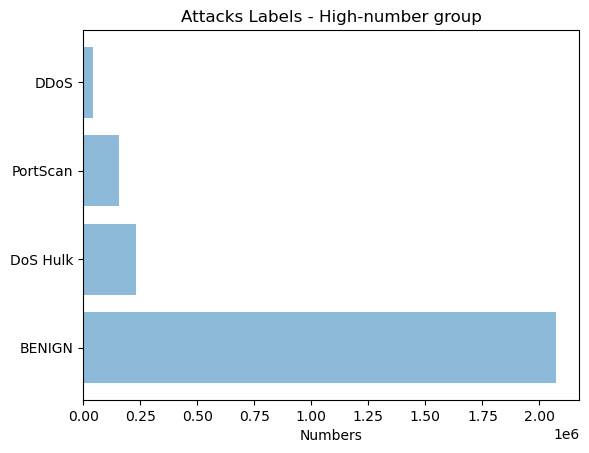

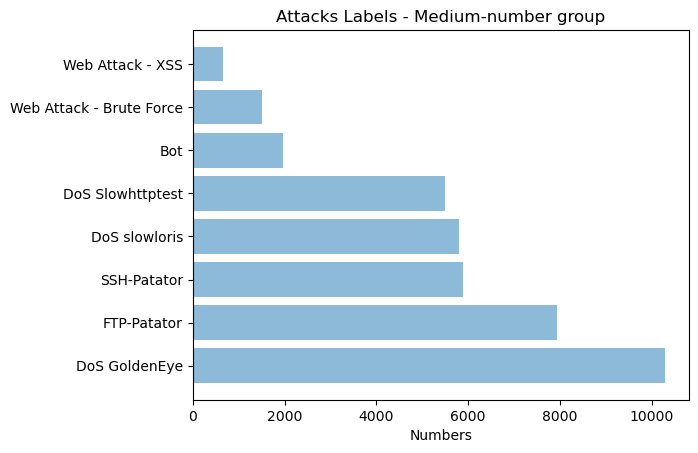

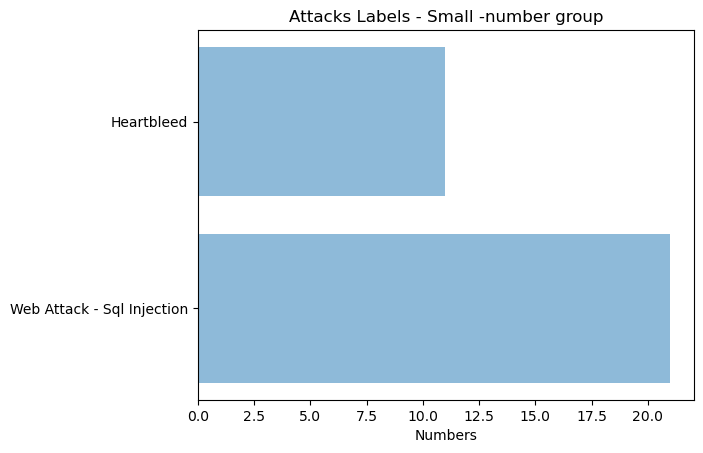

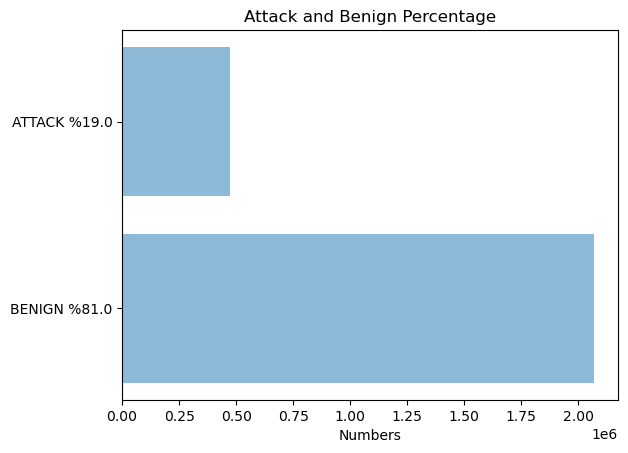

In [8]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
import time
seconds = time.time()


#  graph creation function
def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()

df=pd.read_csv('all_data.csv', usecols=["Label"])
print(df.iloc[:,0].value_counts())
a=(df.iloc[:,0].value_counts())
key=a.keys()
values=a.values
small_labels=[]
small_values=[]
big_labels=[]
big_values=[]
medium_labels=[]
medium_values=[]
attacak=0
benign=0


## In this section, the attacks are grouped under 3 groups,
## so that all values can be seen on the graph.
for i in range(0,len(values)):
    if values[i]>11000:
        big_labels.append(str(key[i]))
        big_values.append(values[i])
    elif values[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(values[i]) 
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(values[i])

    if str(key[i])=="BENIGN":
        benign+=values[i]
    else:
        attacak+=values[i]
        
key =[benign,attacak]


#functions are called to create a chartes
labels=["BENIGN %"+str(round(benign/(benign+attacak),2)*100),
        "ATTACK %"+str(round(attacak/(benign+attacak),2)*100)]

graph(big_labels,big_values,"Numbers","Attacks Labels - High-number group")
graph(medium_labels,medium_values,"Numbers","Attacks Labels - Medium-number group")
graph(small_labels,small_values,"Numbers","Attacks Labels - Small -number group")
graph(labels,key,"Numbers","Attack and Benign Percentage")


In [1]:
##  all_data.csv file is required for the operation of the program.
##  all_data.csv file must be located in the same directory as the program.



##  The purpose of this program is to produce CSV files consisting of only one type of attack and benign flow.
##  These files contain all attack flow and some benign data flow. The rate : (attack= 30% , benign=70%)
##  normal data streams are randomly selected



import random
import os
import pandas as pd
import time
seconds = time.time()
%matplotlib inline

def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("Tthe folder could not be created!")
        

# Headers of column
main_labels=["Flow ID","Source IP","Source Port","Destination IP","Destination Port","Protocol","Timestamp","Flow Duration","Total Fwd Packets",
   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min","Idle Mean","Idle Std","Idle Max","Idle Min","Label","External IP"]
main_labels=( ",".join( i for i in main_labels ) )

attacks=["BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "FTP-Patator", "Heartbleed", "Infiltration", "PortScan", "SSH-Patator", "Web Attack – Brute Force", "Web Attack – Sql Injection", "Web Attack – XSS"]
folder("./attacks/")

benign=2359289

dict_attack={
"Bot":1966,
"DDoS":41835,
"DoS GoldenEye":10293,
"DoS Hulk":231073,
"DoS Slowhttptest":5499,
"DoS slowloris":5796,
"FTP-Patator":7938,
"Heartbleed":11,
"PortScan":158930,
"SSH-Patator":5897,
"Web Attack - Brute Force":1507,
"Web Attack - XSS":652,
"Web Attack - Sql Injection":21}



for i in dict_attack: # in this section, a file is opened for each attack type and is recorded at a random benign flow.
    a,b=0,0
    ths = open(".\\attacks\\"+i + ".csv", "w")
    ths.write(str(main_labels)+"\n")
    benign_num=int(benign/(dict_attack[i]*(7/3)))
    with open("all_data.csv", "r") as file:
        while True:
            try:
                line=file.readline()
                line=line[:-1]
                k=line.split(",")
                if k[83]=="BENIGN":
                    rnd=random.randint(1,benign_num)
                    if rnd==1:
                            ths.write(str(line)+"\n")
                            b+=1
                if  k[83]==i:
                    ths.write(str(line)+"\n")
                    a+=1
                else:
                    continue                       
            except:
                break
    ths.close()
    print(i ,"file is completed\n attack:%d\n benign:%d\n\n\n " %(a,b))

    
##All web attack files are merged into a single file.
webs=["Web Attack - Brute Force","Web Attack - XSS","Web Attack - Sql Injection"]
flag=True
for i in webs:
    df=pd.read_csv(".\\attacks\\"+str(i)+".csv")
    if flag:
        df.to_csv('.\\attacks\\Web Attack.csv' ,index = False)
        flag=False
    else:
        df.to_csv('.\\attacks\\Web Attack.csv' ,index = False,header=False,mode="a")
    os.remove(".\\attacks\\"+str(i)+".csv")




Bot file is completed
 attack:1966
 benign:3861


 
DDoS file is completed
 attack:41835
 benign:86592


 
DoS GoldenEye file is completed
 attack:10293
 benign:21000


 
DoS Hulk file is completed
 attack:231073
 benign:517805


 
DoS Slowhttptest file is completed
 attack:5499
 benign:11275


 
DoS slowloris file is completed
 attack:5796
 benign:11857


 
FTP-Patator file is completed
 attack:7938
 benign:16518


 
Heartbleed file is completed
 attack:11
 benign:19


 
PortScan file is completed
 attack:158930
 benign:345446


 
SSH-Patator file is completed
 attack:5897
 benign:12190


 
Web Attack - Brute Force file is completed
 attack:1507
 benign:3039


 
Web Attack - XSS file is completed
 attack:652
 benign:1261


 
Web Attack - Sql Injection file is completed
 attack:21
 benign:39


 


Bot importance list:
Bot 
                              importance
Features                               
Bwd Packet Length Mean         0.378462
Flow IAT Max                   0.023718
Flow Duration                  0.010343
Flow IAT Min                   0.006277
Flow Bytes/s                   0.001743
Flow IAT Std                   0.001511
Flow IAT Mean                  0.001249
Flow Packets/s                 0.000715
Total Length of Bwd Packets    0.000394
Fwd IAT Total                  0.000285
Total Length of Fwd Packets    0.000160
Bwd Packet Length Max          0.000120
Total Backward Packets         0.000119
Total Fwd Packets              0.000109
Fwd Packet Length Mean         0.000087
Fwd Packet Length Std          0.000077
Fwd Packet Length Max          0.000023
Bwd Packet Length Std          0.000021
Fwd Packet Length Min          0.000020
Bwd Packet Length Min          0.000000 



Bot=["Bwd Packet Length Mean","Flow IAT Max","Flow Duration","Flow IAT Min","Flow Bytes/s

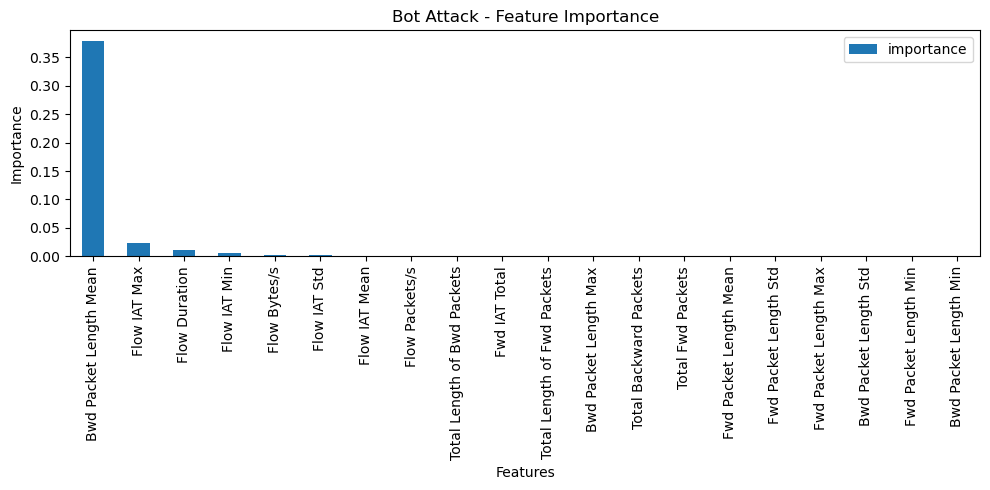

-----------------------------------------------------------------------------------------------




DDoS importance list:
DDoS 
                              importance
Features                               
Bwd Packet Length Std          0.349907
Fwd Packet Length Max          0.111600
Total Backward Packets         0.074808
Total Length of Fwd Packets    0.046774
Fwd IAT Total                  0.014070
Flow IAT Min                   0.006332
Flow Duration                  0.006203
Flow IAT Std                   0.005610
Flow IAT Mean                  0.005376
Flow IAT Max                   0.004892
Flow Bytes/s                   0.002990
Flow Packets/s                 0.001002
Bwd Packet Length Max          0.000611
Bwd Packet Length Min          0.000455
Fwd Packet Length Std          0.000342
Fwd Packet Length Mean         0.000295
Bwd Packet Length Mean         0.000293
Total Length of Bwd Packets    0.000085
Total Fwd Packets              0.000042
Fwd Packet Length Min          

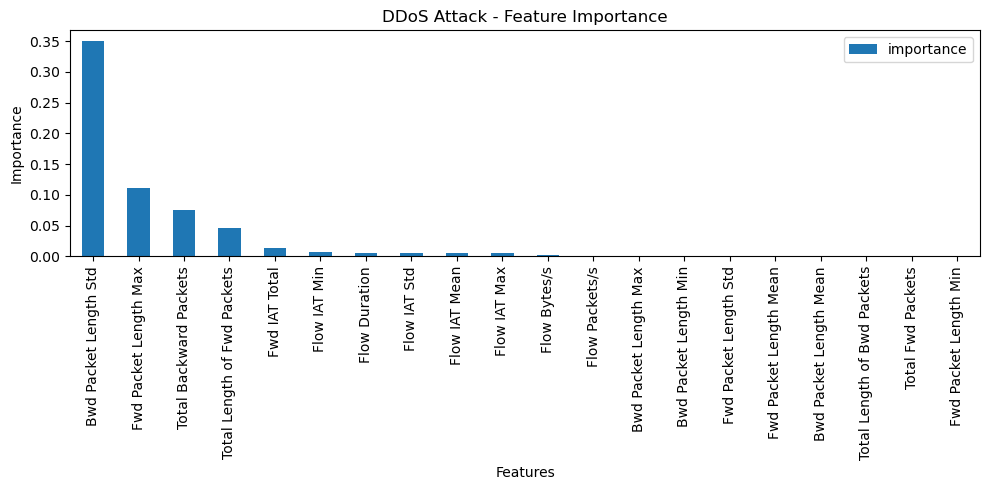

-----------------------------------------------------------------------------------------------




DoS GoldenEye importance list:
DoS GoldenEye 
                              importance
Features                               
Flow IAT Max                   0.536410
Total Backward Packets         0.043751
Flow IAT Min                   0.016789
Bwd Packet Length Mean         0.001371
Flow Bytes/s                   0.001065
Bwd Packet Length Std          0.001062
Fwd IAT Total                  0.001010
Flow Duration                  0.000886
Fwd Packet Length Max          0.000774
Fwd Packet Length Min          0.000697
Total Length of Fwd Packets    0.000343
Total Length of Bwd Packets    0.000263
Bwd Packet Length Max          0.000250
Flow Packets/s                 0.000155
Flow IAT Mean                  0.000128
Fwd Packet Length Mean         0.000125
Flow IAT Std                   0.000074
Fwd Packet Length Std          0.000066
Total Fwd Packets              0.000019
Bwd Packet Le

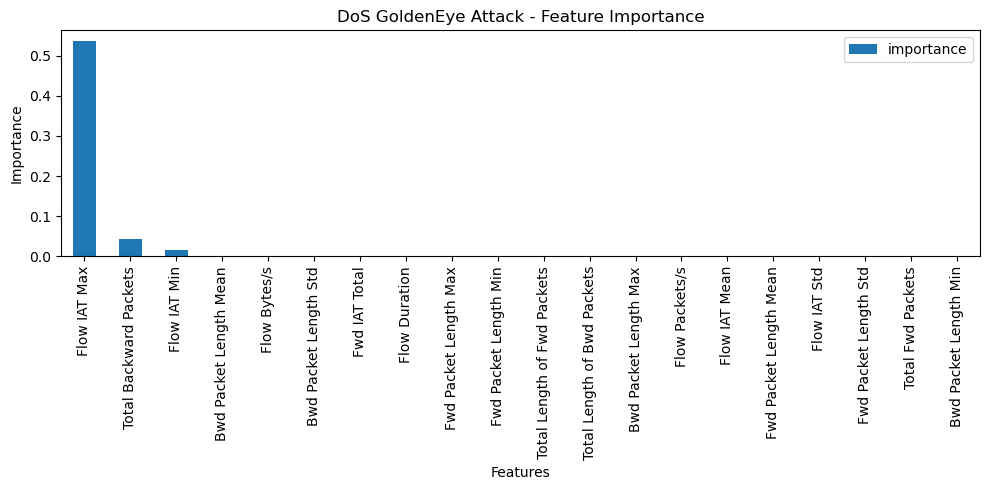

-----------------------------------------------------------------------------------------------




DoS Hulk importance list:
DoS Hulk 
                                importance
Features                                 
Bwd Packet Length Std        5.023405e-01
Fwd Packet Length Std        7.769561e-02
Total Length of Fwd Packets  8.992644e-03
Fwd Packet Length Max        4.442514e-03
Flow IAT Min                 8.626472e-04
Fwd IAT Total                2.979939e-04
Flow IAT Max                 2.265798e-04
Total Backward Packets       1.980705e-04
Flow Bytes/s                 1.682065e-04
Bwd Packet Length Max        1.580166e-04
Flow Duration                1.511559e-04
Flow IAT Mean                1.113420e-04
Flow Packets/s               6.523696e-05
Total Length of Bwd Packets  6.370383e-05
Flow IAT Std                 5.282423e-05
Bwd Packet Length Min        3.633150e-05
Bwd Packet Length Mean       3.168925e-05
Total Fwd Packets            1.571161e-05
Fwd Packet Length Mean 

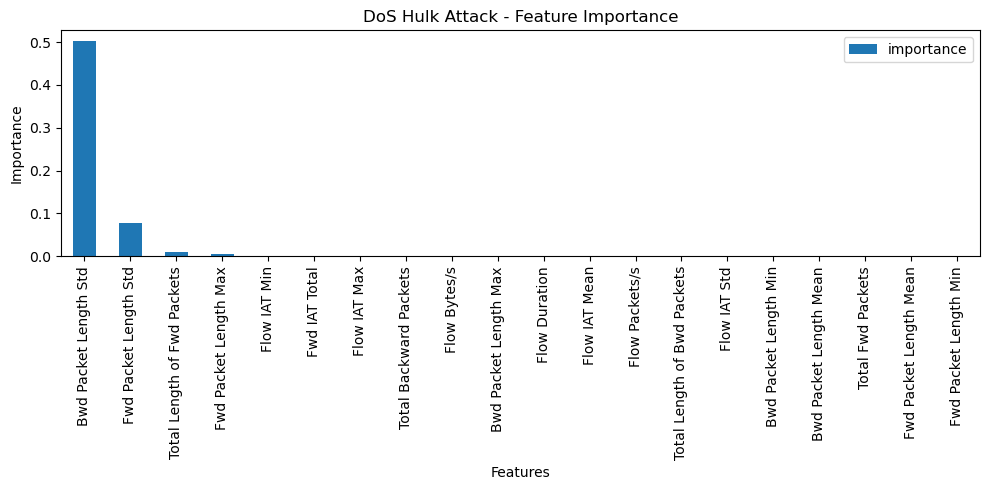

-----------------------------------------------------------------------------------------------




DoS Slowhttptest importance list:
DoS Slowhttptest 
                              importance
Features                               
Flow IAT Mean                  0.641433
Fwd Packet Length Min          0.093603
Total Length of Bwd Packets    0.019160
Bwd Packet Length Mean         0.015455
Fwd Packet Length Std          0.012252
Fwd Packet Length Mean         0.009522
Bwd Packet Length Max          0.005594
Bwd Packet Length Std          0.003825
Flow IAT Min                   0.001662
Flow IAT Std                   0.001379
Flow Bytes/s                   0.000600
Flow Duration                  0.000575
Bwd Packet Length Min          0.000526
Fwd Packet Length Max          0.000494
Flow IAT Max                   0.000457
Fwd IAT Total                  0.000339
Total Fwd Packets              0.000245
Total Length of Fwd Packets    0.000227
Total Backward Packets         0.000209
Flow Pa

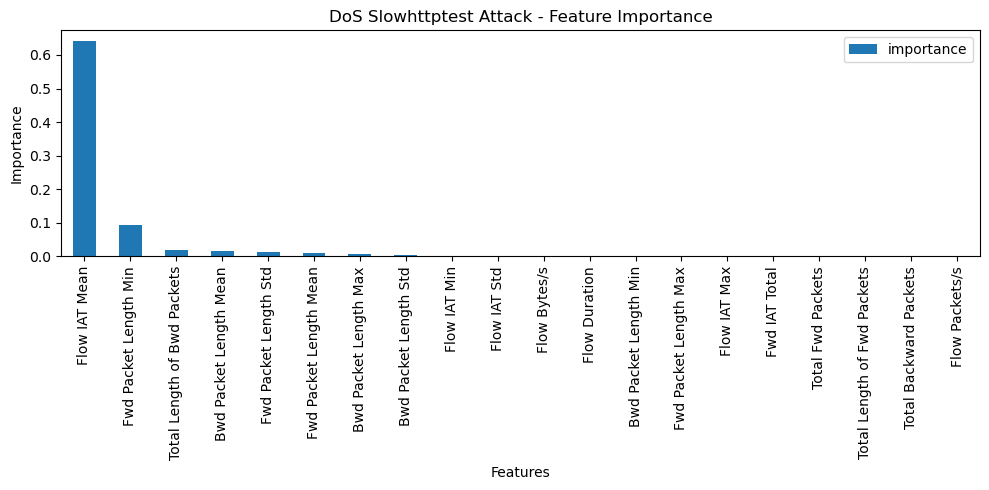

-----------------------------------------------------------------------------------------------




DoS slowloris importance list:
DoS slowloris 
                              importance
Features                               
Flow IAT Mean                  0.432982
Bwd Packet Length Mean         0.115139
Flow IAT Std                   0.022721
Fwd Packet Length Std          0.014564
Total Fwd Packets              0.013065
Total Length of Bwd Packets    0.012358
Fwd Packet Length Min          0.008391
Fwd IAT Total                  0.001680
Fwd Packet Length Max          0.001441
Fwd Packet Length Mean         0.001069
Flow Bytes/s                   0.001011
Bwd Packet Length Std          0.000911
Total Length of Fwd Packets    0.000892
Flow IAT Min                   0.000685
Flow IAT Max                   0.000642
Total Backward Packets         0.000537
Flow Duration                  0.000493
Bwd Packet Length Max          0.000447
Flow Packets/s                 0.000244
Bwd Packet Le

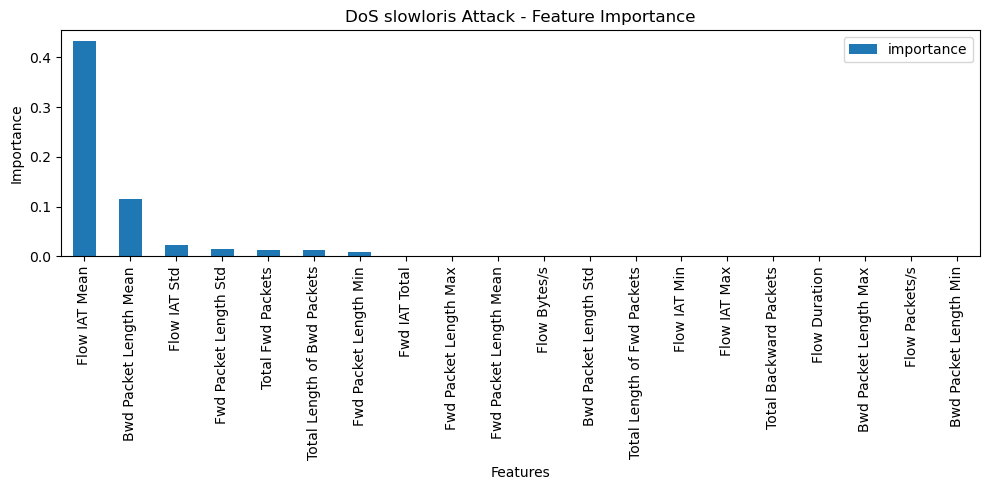

-----------------------------------------------------------------------------------------------




FTP-Patator importance list:
FTP-Patator 
                              importance
Features                               
Fwd Packet Length Max          0.229244
Fwd Packet Length Std          0.023247
Fwd Packet Length Mean         0.009804
Flow IAT Min                   0.000483
Bwd Packet Length Mean         0.000310
Total Length of Bwd Packets    0.000247
Bwd Packet Length Max          0.000227
Bwd Packet Length Std          0.000216
Total Fwd Packets              0.000168
Flow Duration                  0.000127
Flow IAT Mean                  0.000115
Total Length of Fwd Packets    0.000106
Total Backward Packets         0.000105
Flow IAT Max                   0.000100
Flow Packets/s                 0.000097
Fwd IAT Total                  0.000094
Flow Bytes/s                   0.000059
Fwd Packet Length Min          0.000058
Flow IAT Std                   0.000031
Bwd Packet Length

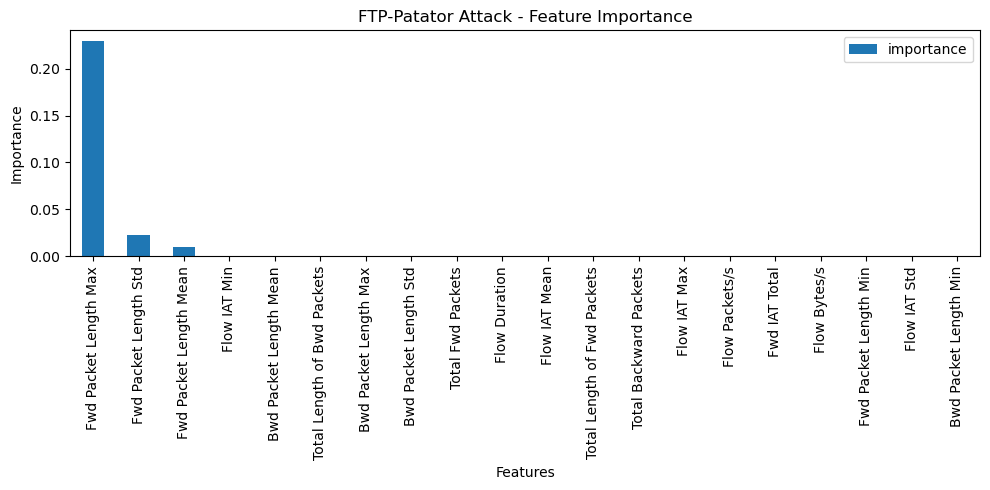

-----------------------------------------------------------------------------------------------




Heartbleed importance list:
Heartbleed 
                              importance
Features                               
Bwd Packet Length Mean            0.056
Bwd Packet Length Max             0.048
Total Backward Packets            0.044
Total Length of Bwd Packets       0.044
Total Fwd Packets                 0.044
Fwd IAT Total                     0.020
Flow IAT Min                      0.020
Total Length of Fwd Packets       0.012
Flow Duration                     0.008
Fwd Packet Length Std             0.004
Bwd Packet Length Std             0.004
Fwd Packet Length Max             0.004
Fwd Packet Length Mean            0.000
Fwd Packet Length Min             0.000
Flow Bytes/s                      0.000
Flow Packets/s                    0.000
Flow IAT Mean                     0.000
Flow IAT Std                      0.000
Flow IAT Max                      0.000
Bwd Packet Length M

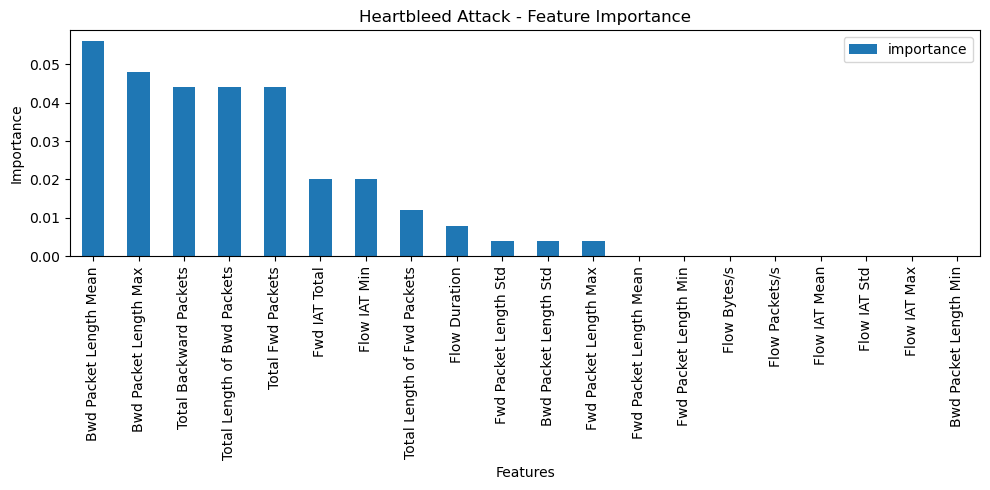

-----------------------------------------------------------------------------------------------




Infiltration importance list:
Infiltration 
                              importance
Features                               
Flow Duration                       0.0
Total Fwd Packets                   0.0
Flow IAT Min                        0.0
Flow IAT Max                        0.0
Flow IAT Std                        0.0
Flow IAT Mean                       0.0
Flow Packets/s                      0.0
Flow Bytes/s                        0.0
Bwd Packet Length Std               0.0
Bwd Packet Length Mean              0.0
Bwd Packet Length Min               0.0
Bwd Packet Length Max               0.0
Fwd Packet Length Std               0.0
Fwd Packet Length Mean              0.0
Fwd Packet Length Min               0.0
Fwd Packet Length Max               0.0
Total Length of Bwd Packets         0.0
Total Length of Fwd Packets         0.0
Total Backward Packets              0.0
Fwd IAT Total  

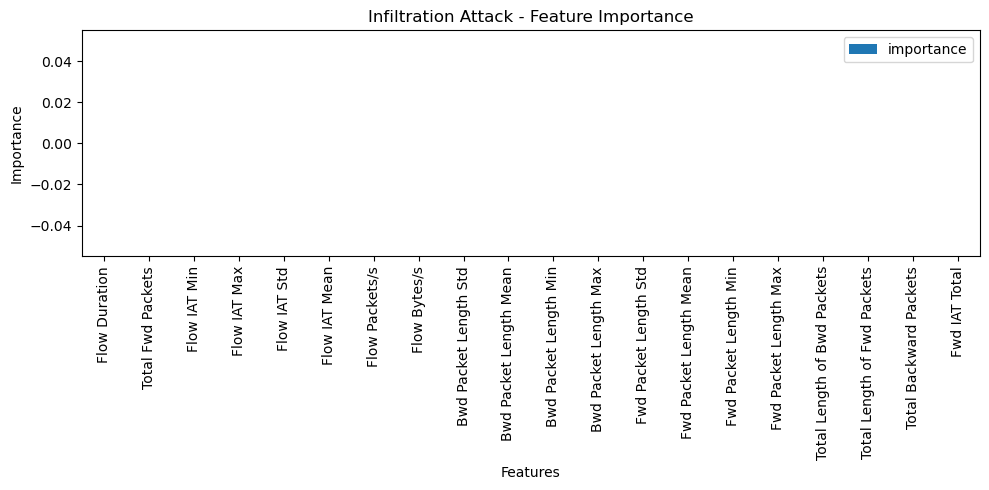

-----------------------------------------------------------------------------------------------




PortScan importance list:
PortScan 
                              importance
Features                               
Total Length of Fwd Packets    0.325083
Flow Bytes/s                   0.302966
Flow IAT Max                   0.000560
Fwd IAT Total                  0.000502
Flow Duration                  0.000410
Fwd Packet Length Max          0.000128
Flow IAT Mean                  0.000123
Total Length of Bwd Packets    0.000049
Bwd Packet Length Max          0.000043
Bwd Packet Length Mean         0.000039
Flow Packets/s                 0.000030
Bwd Packet Length Min          0.000029
Total Backward Packets         0.000025
Fwd Packet Length Mean         0.000023
Bwd Packet Length Std          0.000020
Flow IAT Min                   0.000019
Flow IAT Std                   0.000018
Fwd Packet Length Std          0.000015
Total Fwd Packets              0.000010
Fwd Packet Length Min  

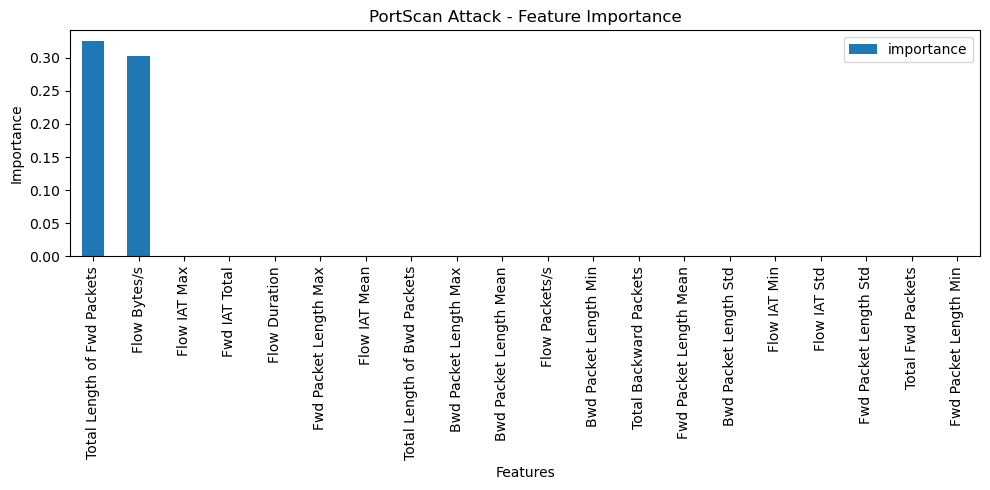

-----------------------------------------------------------------------------------------------




SSH-Patator importance list:
SSH-Patator 
                              importance
Features                               
Fwd Packet Length Max          0.002189
Flow IAT Mean                  0.000535
Total Length of Fwd Packets    0.000528
Flow IAT Max                   0.000520
Flow Duration                  0.000480
Flow Packets/s                 0.000419
Fwd IAT Total                  0.000331
Flow IAT Std                   0.000237
Fwd Packet Length Mean         0.000154
Fwd Packet Length Std          0.000077
Flow IAT Min                   0.000066
Fwd Packet Length Min          0.000062
Bwd Packet Length Max          0.000051
Bwd Packet Length Std          0.000048
Total Backward Packets         0.000048
Bwd Packet Length Mean         0.000038
Flow Bytes/s                   0.000031
Total Fwd Packets              0.000025
Total Length of Bwd Packets    0.000013
Bwd Packet Length

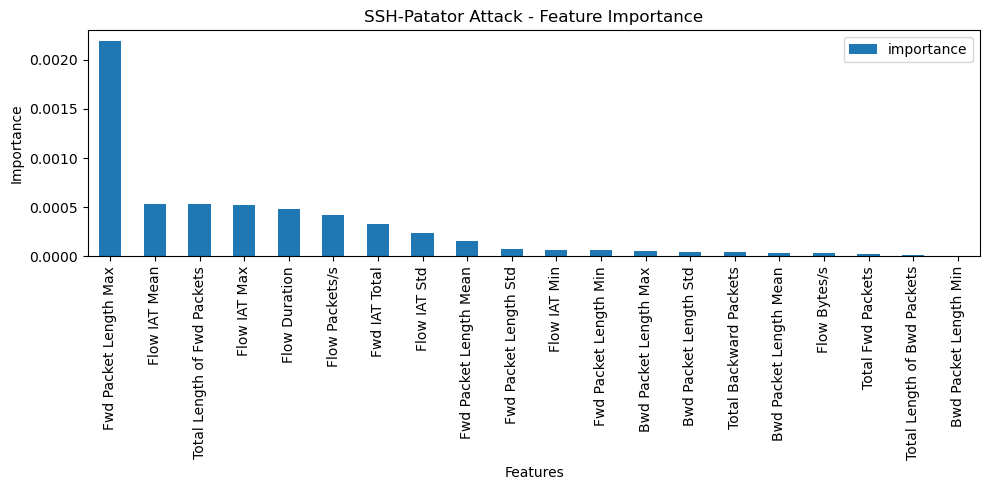

-----------------------------------------------------------------------------------------------




Web Attack importance list:
Web Attack 
                              importance
Features                               
Bwd Packet Length Std          0.011871
Flow Bytes/s                   0.003915
Total Length of Fwd Packets    0.002278
Flow IAT Min                   0.002219
Bwd Packet Length Max          0.001405
Fwd Packet Length Std          0.000990
Flow IAT Max                   0.000908
Flow Duration                  0.000727
Flow Packets/s                 0.000524
Flow IAT Mean                  0.000409
Total Fwd Packets              0.000407
Fwd Packet Length Max          0.000336
Fwd Packet Length Mean         0.000282
Fwd IAT Total                  0.000210
Bwd Packet Length Mean         0.000182
Total Length of Bwd Packets    0.000133
Flow IAT Std                   0.000075
Total Backward Packets         0.000026
Fwd Packet Length Min          0.000019
Bwd Packet Length M

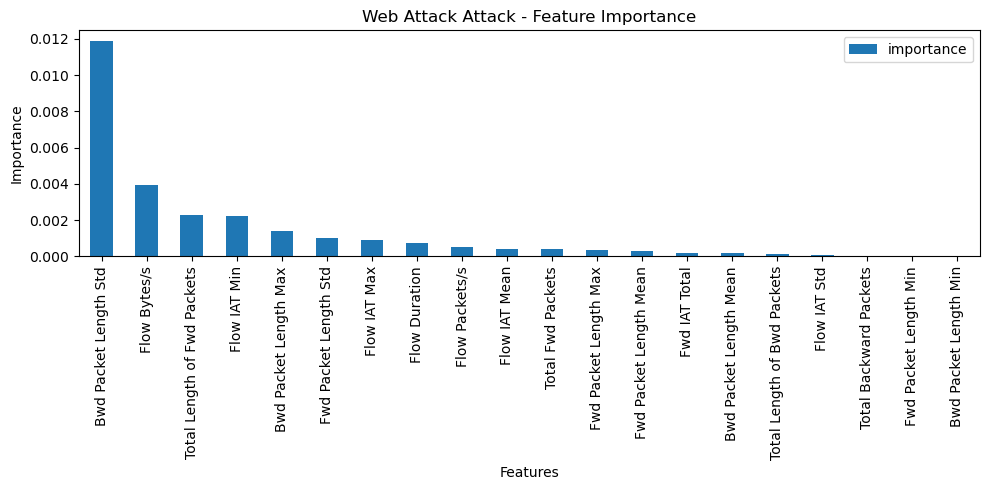

-----------------------------------------------------------------------------------------------




mission accomplished!
Total operation time: =  3783.448933362961 seconds


In [22]:
##  "attacks" folder (with attack csv files) is required for the operation of the program.
##  "attacks" folder must be located in the same directory as the program.


##  the purpose of this code is to determine which features to use in the machine learning phase.
##  for this purpose, the importance weights of the attacks are calculated.
##  this calculation was made using sklearn-RandomForestRegressor.

##  the some codes parts used for calculation and graphing are taken from the following site.
##  http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

def folder(f_name): #this function creates a folder named "feaure_pics" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        

# CSV files names:
csv_files=os.listdir("attacks")# It creates a list of file names in the "attacks" folder.

# Headers of column
main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

ths = open("importance_list_for_attack_files.csv", "w")
folder("./feaure_pics/")
for j in csv_files:
    df=pd.read_csv(".\\attacks\\"+j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values
    
    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0
   

    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(j[0:-4],"importance list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', orientation = 'portrait', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()



all_data importance list:
all_data 
                              importance
Features                               
Bwd Packet Length Std          0.239669
Flow Bytes/s                   0.175722
Fwd Packet Length Std          0.065080
Fwd Packet Length Mean         0.053303
Flow IAT Std                   0.008978
Flow IAT Mean                  0.007104
Flow IAT Min                   0.006315
Fwd IAT Total                  0.005189
Flow Duration                  0.004133
Flow IAT Max                   0.003150
Total Length of Bwd Packets    0.002568
Bwd Packet Length Max          0.001607
Total Length of Fwd Packets    0.000939
Fwd Packet Length Min          0.000641
Flow Packets/s                 0.000525
Bwd Packet Length Mean         0.000407
Total Backward Packets         0.000329
Fwd Packet Length Max          0.000141
Total Fwd Packets              0.000134
Bwd Packet Length Min          0.000102 



all_data=["Bwd Packet Length Std","Flow Bytes/s","Fwd Packet Length Std","Fwd P

C:\Users\Irfan Arshad\AppData\Local\Temp\ipykernel_18468\4152743287.py:96: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', papertype = 'a4', orientation = 'portrait', format = 'pdf')


-----------------------------------------------------------------------------------------------




mission accomplished!
Total operation time: =  25856.472009420395 secomds


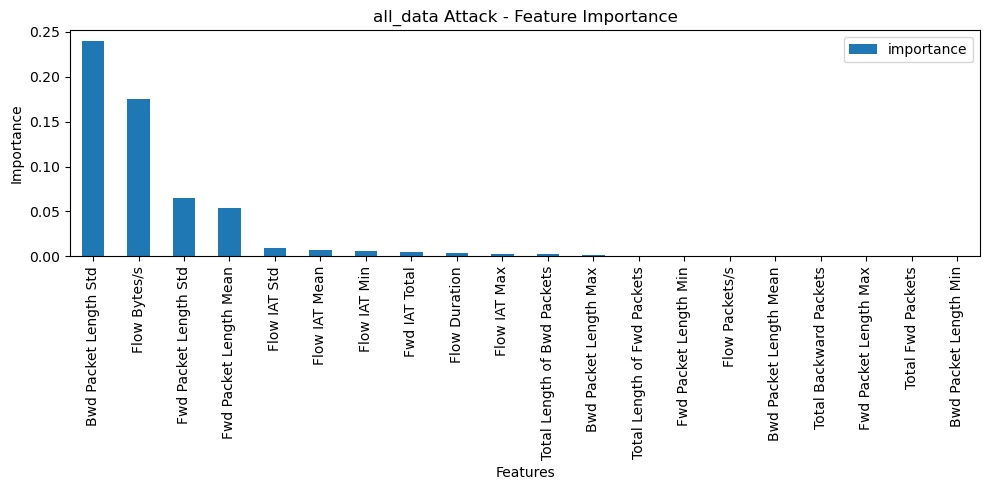

In [1]:
##  "all_data.csv" file is required for the operation of the program.
##  "all_data.csv" file must be located in the same directory as the program.


##  the purpose of this code is to determine which features to use in the machine learning phase.
##  for this purpose, the importance weights of the attacks are calculated.
##  this calculation was made using sklearn-RandomForestRegressor.

##  the some codes parts used for calculation and graphing are taken from the following site.
##  http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

def folder(f_name): #this function creates a folder named "feaure_pics" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        

# CSV files names:
csv_files=["all_data.csv"]# It creates a list of file names in the "attacks" folder.

# Headers of column
main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

ths = open("importance_list_all_data.csv", "w")
folder("./feaure_pics/")
for j in csv_files:
    df=pd.read_csv(j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values
   
   
    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0


    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(j[0:-4],"importance list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', papertype = 'a4', orientation = 'portrait', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    #plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"secomds")
ths.close()



File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Bot               Naive Bayes        0.57            0.72            0.67            0.56            0.0135         
Bot               QDA                0.71            0.77            0.78            0.71            0.0097         
Bot               ID3                0.97            0.96            0.98            0.97            0.0149         
Bot               AdaBoost           0.97            0.96            0.98            0.97            0.2026         
Bot               MLP                0.67            0.64            0.57            0.56            0.4036         
Bot               Nearest Neighbors  0.95            0.94            0.95            0.95            0.087          


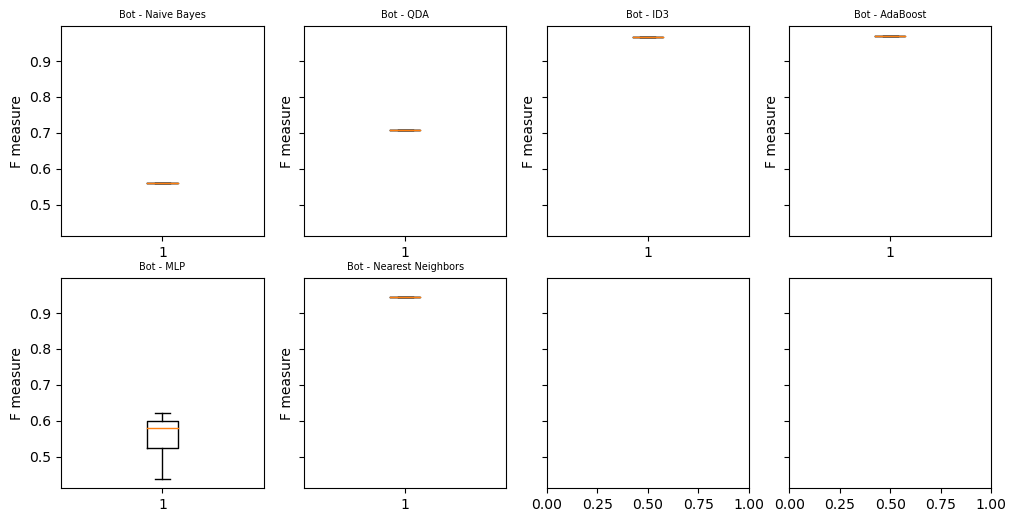


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DDoS              Naive Bayes        0.76            0.74            0.69            0.7             0.0889         
DDoS              QDA                0.46            0.69            0.6             0.44            0.0882         
DDoS              ID3                0.96            0.95            0.97            0.96            0.2109         
DDoS              AdaBoost           0.96            0.95            0.97            0.96            3.6025         
DDoS              MLP                0.7             0.59            0.54            0.48            23.6533        
DDoS              Nearest Neighbors  0.92            0.91            0.92            0.91            2.1954         


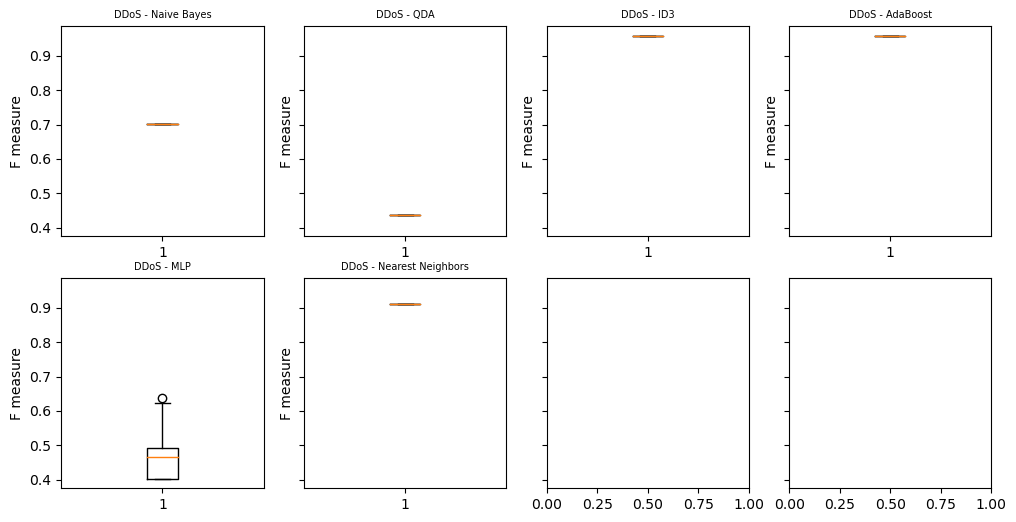


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS GoldenEye     Naive Bayes        0.84            0.84            0.79            0.8             0.0223         
DoS GoldenEye     QDA                0.51            0.69            0.63            0.5             0.0216         
DoS GoldenEye     ID3                0.99            0.99            0.99            0.99            0.0513         
DoS GoldenEye     AdaBoost           0.98            0.97            0.98            0.98            0.8997         
DoS GoldenEye     MLP                0.72            0.73            0.69            0.65            5.8884         
DoS GoldenEye     Nearest Neighbors  0.97            0.97            0.97            0.97            0.4994         


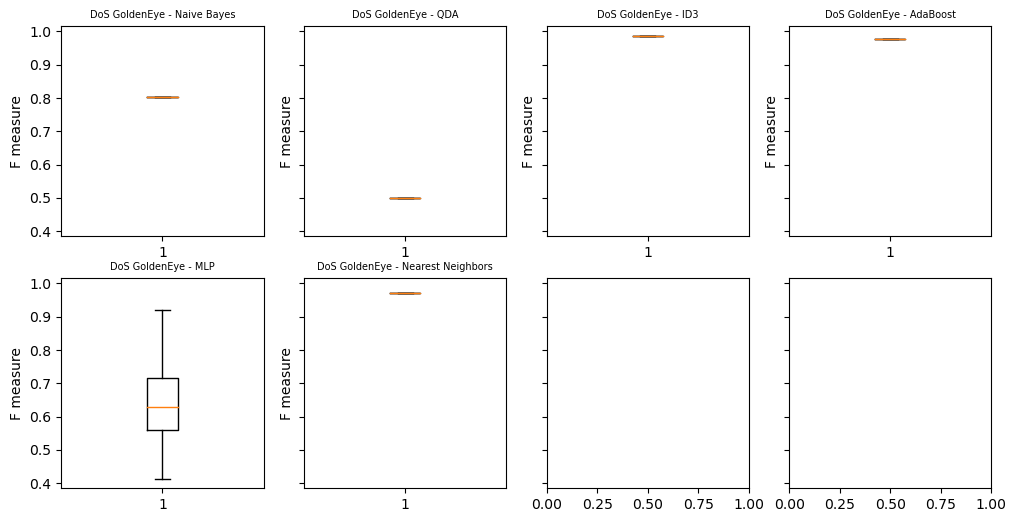


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Hulk          Naive Bayes        0.37            0.66            0.54            0.32            0.4845         
DoS Hulk          QDA                0.44            0.68            0.59            0.42            0.5356         
DoS Hulk          ID3                0.96            0.95            0.95            0.95            0.9643         
DoS Hulk          AdaBoost           0.96            0.95            0.95            0.95            31.7505        
DoS Hulk          MLP                0.95            0.95            0.94            0.94            76.8296        
DoS Hulk          Nearest Neighbors  0.96            0.95            0.96            0.96            45.1199        


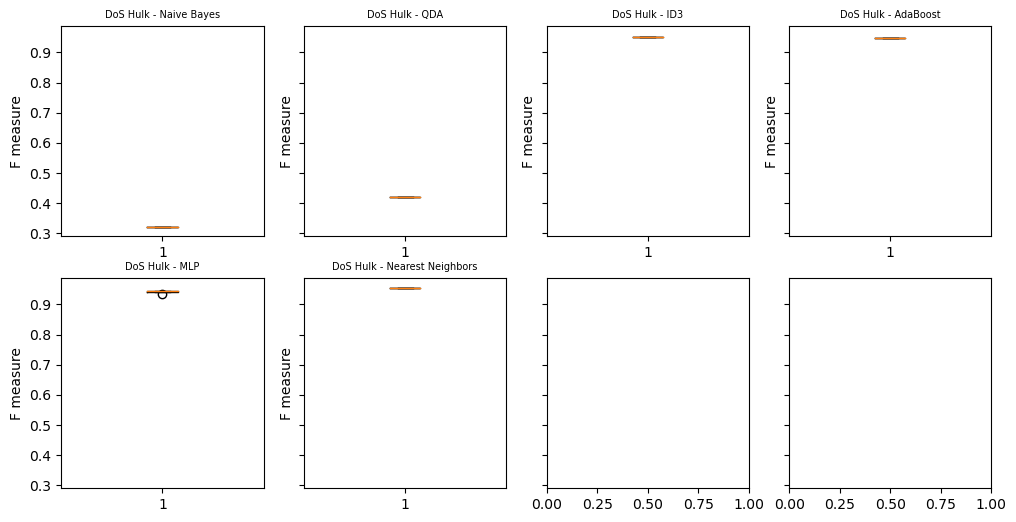


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Slowhttptest  Naive Bayes        0.44            0.62            0.57            0.42            0.0155         
DoS Slowhttptest  QDA                0.46            0.66            0.59            0.44            0.0142         
DoS Slowhttptest  ID3                0.99            0.99            0.98            0.98            0.0265         
DoS Slowhttptest  AdaBoost           0.99            0.99            0.99            0.99            0.4089         
DoS Slowhttptest  MLP                0.76            0.79            0.73            0.67            2.1116         
DoS Slowhttptest  Nearest Neighbors  0.98            0.98            0.99            0.98            0.4094         


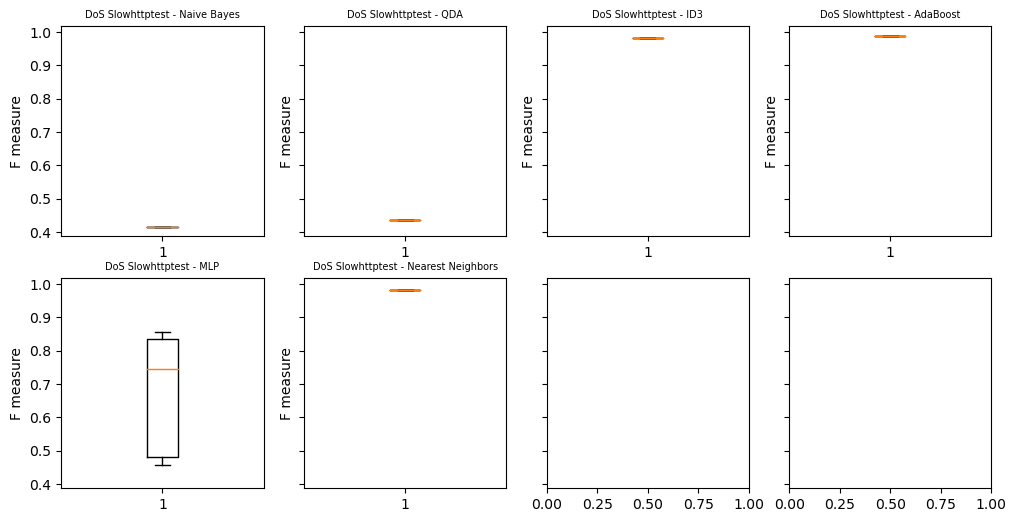


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS slowloris     Naive Bayes        0.45            0.69            0.59            0.43            0.0163         
DoS slowloris     QDA                0.51            0.67            0.63            0.51            0.0133         
DoS slowloris     ID3                0.96            0.97            0.94            0.95            0.0301         
DoS slowloris     AdaBoost           0.95            0.96            0.93            0.94            0.4322         
DoS slowloris     MLP                0.84            0.8             0.83            0.8             2.0981         
DoS slowloris     Nearest Neighbors  0.95            0.94            0.94            0.94            0.2614         


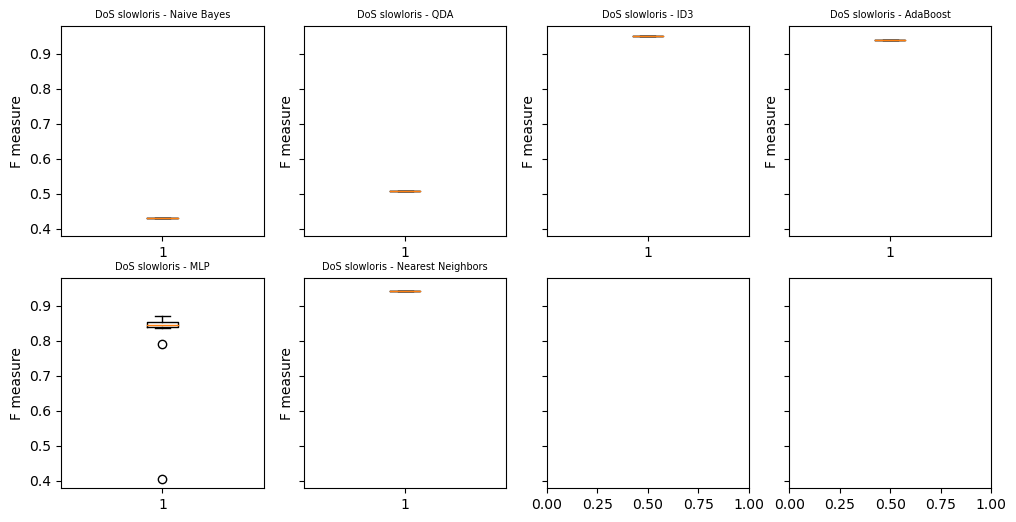


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
FTP-Patator       Naive Bayes        1.0             1.0             1.0             1.0             0.0169         
FTP-Patator       QDA                1.0             1.0             1.0             1.0             0.0183         
FTP-Patator       ID3                1.0             1.0             1.0             1.0             0.0223         
FTP-Patator       AdaBoost           1.0             1.0             1.0             1.0             0.4854         
FTP-Patator       MLP                1.0             1.0             1.0             1.0             4.4773         
FTP-Patator       Nearest Neighbors  1.0             1.0             1.0             1.0             0.5225         


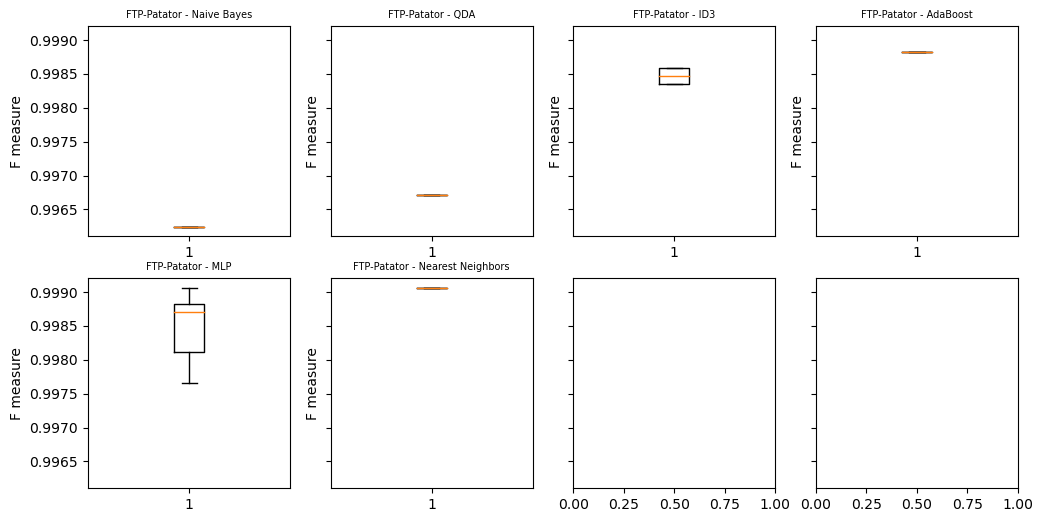


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Heartbleed        Naive Bayes        1.0             1.0             1.0             1.0             0.0075         
Heartbleed        QDA                1.0             1.0             1.0             1.0             0.0078         
Heartbleed        ID3                1.0             1.0             1.0             1.0             0.0083         
Heartbleed        AdaBoost           1.0             1.0             1.0             1.0             0.0109         
Heartbleed        MLP                0.82            0.81            0.84            0.79            0.1738         
Heartbleed        Nearest Neighbors  1.0             1.0             1.0             1.0             0.0088         


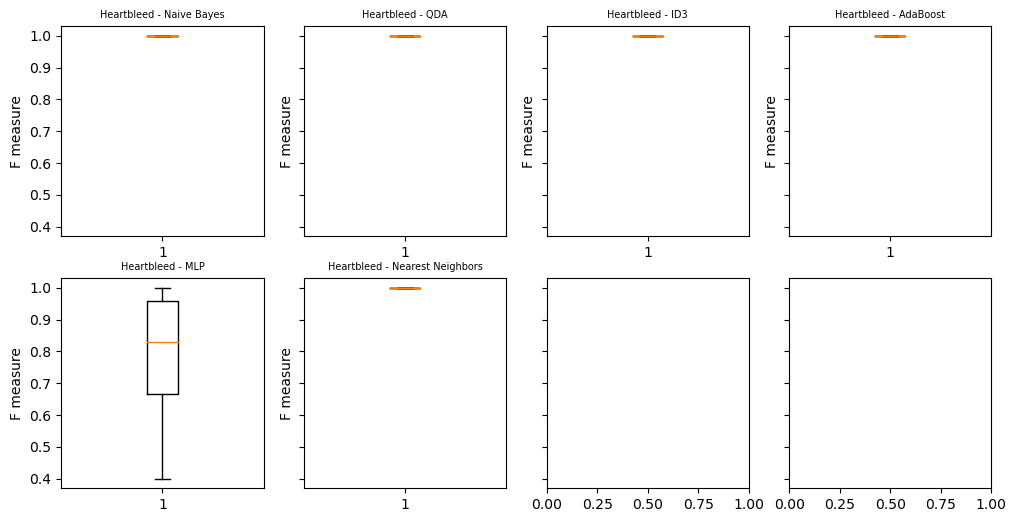


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
PortScan          Naive Bayes        0.46            0.67            0.6             0.44            0.3969         
PortScan          QDA                0.86            0.85            0.9             0.86            0.4237         
PortScan          ID3                1.0             1.0             1.0             1.0             1.0019         
PortScan          AdaBoost           1.0             1.0             1.0             1.0             16.3511        
PortScan          MLP                0.71            0.62            0.57            0.48            33.3087        
PortScan          Nearest Neighbors  1.0             1.0             1.0             1.0             15.4002        


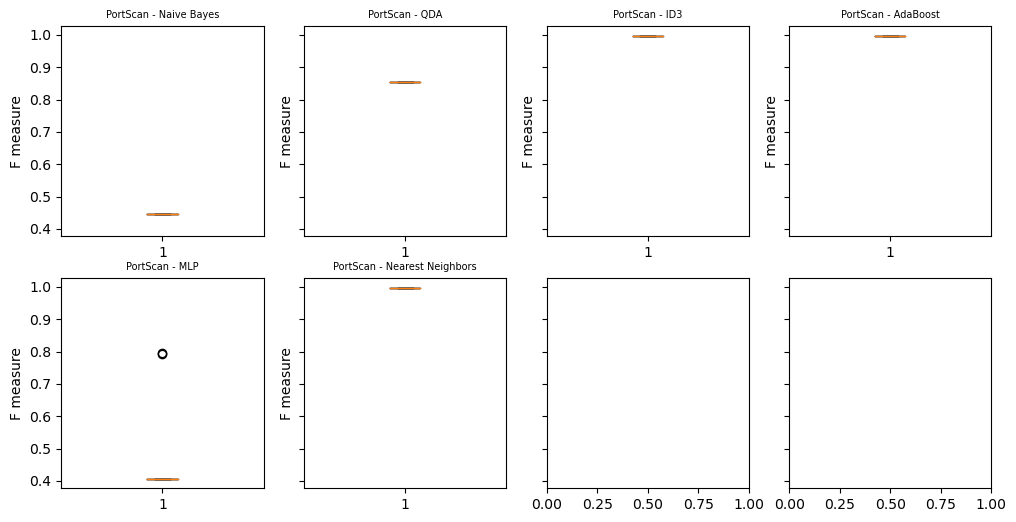


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
SSH-Patator       Naive Bayes        0.43            0.68            0.57            0.4             0.0141         
SSH-Patator       QDA                0.49            0.69            0.61            0.47            0.0141         
SSH-Patator       ID3                0.96            0.94            0.96            0.95            0.0328         
SSH-Patator       AdaBoost           0.96            0.94            0.96            0.95            0.4672         
SSH-Patator       MLP                0.86            0.85            0.84            0.84            1.0749         
SSH-Patator       Nearest Neighbors  0.96            0.95            0.96            0.95            0.2812         


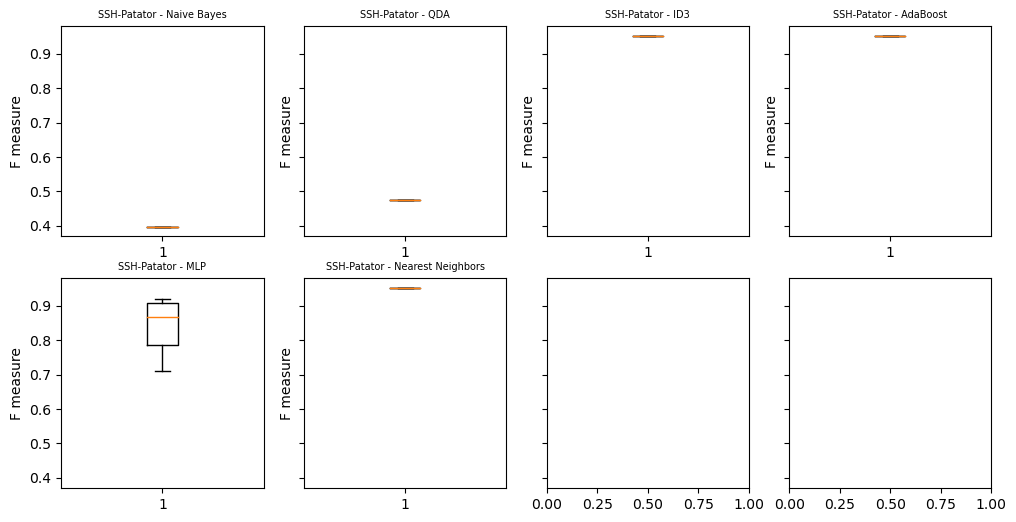


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Web Attack        Naive Bayes        0.69            0.76            0.77            0.69            0.0094         
Web Attack        QDA                0.81            0.81            0.86            0.81            0.0109         
Web Attack        ID3                0.95            0.95            0.94            0.95            0.0156         
Web Attack        AdaBoost           0.96            0.96            0.95            0.95            0.2344         
Web Attack        MLP                0.71            0.7             0.69            0.63            0.4859         
Web Attack        Nearest Neighbors  0.93            0.92            0.93            0.92            0.1016         


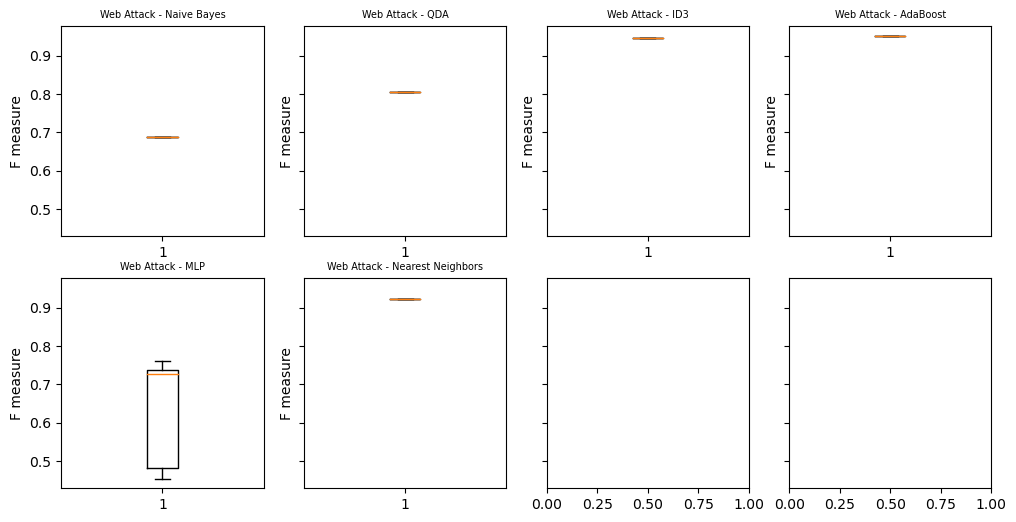


------------------------------------------------------------------------------------------------------


mission accomplished!
Total operation time: =  2769.467720270157 seconds


In [29]:
##  "all_data.csv" file is required for the operation of the program.
##  "all_data.csv" file must be located in the same directory as the program.

##  the purpose of this program is to apply machine learning algorithms to the dataset and observe the performance of algorithms.
##  the algorithms used are:Naive Bayes, QDA, Random Forest, ID3, AdaBoost, MLP, Nearest Neighbors
##  As the program display output data include: file name, machine learning algorithm name, accuracy,Precision, Recall, F1-score,Time
##  the program will create a CSV file that prints the results and a folder containing graphics.

##  the some codes parts used for calculation and graphing are taken from the following site.
##  http://scikit-learn.org


from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
import pickle
warnings.filterwarnings("ignore")


result="./results/results_1.csv" #a CSV file is named in which the results are saved.
csv_files=os.listdir("attacks")# CSV files names: #The names of the files in the attacks folder are taken and assigned to a list (csv_files).
path=".\\attacks\\"
repetition=10


def folder(f_name): #this function creates a folder named "results" and "result_graph_1" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

folder_name="./results/"
folder(folder_name)
folder_name="./models/"
folder(folder_name)
folder_name="./results/result_graph_1/"
folder(folder_name)


#The machine learning algorithms to be used are defined in a dictionary (ml_list).
ml_list={
"Naive Bayes":GaussianNB(),
"QDA":QDA(),
"ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
"AdaBoost":AdaBoostClassifier(),
"MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
"Nearest Neighbors":KNeighborsClassifier(3)}



# the features to be used for each attack type is defined in a dictionary(features).
# the first 4 of the features created by the file "04_1_feature_selection_for_attack_files.py" are used here.
features={"Bot":["Bwd Packet Length Mean","Flow IAT Max","Flow Duration","Flow IAT Min","Label"],
"DDoS":["Bwd Packet Length Std","Total Backward Packets","Fwd IAT Total","Flow Duration","Label"],
"DoS GoldenEye":["Flow IAT Max","Bwd Packet Length Std","Flow IAT Min","Total Backward Packets","Label"],
"DoS Hulk":["Bwd Packet Length Std","Fwd Packet Length Std","Fwd Packet Length Max","Flow IAT Min","Label"],
"DoS Slowhttptest":["Flow IAT Mean","Fwd Packet Length Min","Bwd Packet Length Mean","Total Length of Bwd Packets","Label"],
"DoS slowloris":["Flow IAT Mean","Total Length of Bwd Packets","Bwd Packet Length Mean","Total Fwd Packets","Label"],
"FTP-Patator":["Fwd Packet Length Max","Fwd Packet Length Std","Fwd Packet Length Mean","Bwd Packet Length Std","Label"],
"Heartbleed":["Total Backward Packets","Fwd Packet Length Max","Flow IAT Min","Bwd Packet Length Max","Label"],
"PortScan":["Flow Bytes/s","Total Length of Fwd Packets","Fwd IAT Total","Flow Duration","Label"],
"SSH-Patator":["Fwd Packet Length Max","Flow Duration","Flow IAT Max","Total Length of Fwd Packets","Label"],
"Web Attack":["Bwd Packet Length Std","Total Length of Fwd Packets","Flow Bytes/s","Flow IAT Max","Label"]}

seconds=time.time()#time stamp for all processing time



with open(result, "w", newline="",encoding="utf-8") as f:#a CSV file is created to save the results obtained.
    wrt = csv.writer(f)
    wrt.writerow(["File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"])




for j in csv_files: #this loop runs on the list containing the filenames.Operations are repeated for all attack files
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"))# print output header
    a=[]
    
    feature_list=list(features[j[0:-4]])
    df=pd.read_csv(path+j,usecols=feature_list)#read an attack file.
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]: #it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    
    y = df["Label"] #this section separates the label and the data into two separate pieces, as Label=y Data=X 
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    
    for ii in ml_list: #this loop runs on the list containing the machine learning algorithm names. Operations are repeated for all the 7 algorithm
        clf = ml_list[ii]
        precision=[]
        recall=[]
        f1=[]
        accuracy=[]
        t_time=[]
        for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
            second=time.time()#time stamp for processing time

            # cross-validation
            X_train, X_test, y_train, y_test = train_test_split(X, y,#  data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm (80% train,%20 test). 
                test_size = 0.20, random_state = repetition)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).


            #machine learning algorithm is applied in this section
            clf = ml_list[ii]#choose algorithm from ml_list dictionary                                                                          
            clf.fit(X_train, y_train)
            predict =clf.predict(X_test)
        
            #makes "classification report" and assigns the precision, f-measure, and recall values.s.    
                  
            f_1=f1_score(y_test, predict, average='macro')
            pr=precision_score(y_test, predict, average='macro')
            rc=recall_score(y_test, predict, average='macro')

            
            
            
            
            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time()-second)) )


            
        print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)), 
            str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))#the result of the ten repetitions is printed on the screen.

        with open(result, "a", newline="",encoding="utf-8") as f: # all the values found are saved in the opened file.
            wrt = csv.writer(f)
            for i in range(0,len(t_time)):
                wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])#file name, algorithm name, precision, recall and f-measure are writed in CSV file
        a.append(f1)
        f_path = "./models/"
        file_name = os.path.join(f_path, j[0:-4] + "_" + ii + ".pkl")
        # Save the classifier using pickle
        with open(file_name, "wb") as file:
            pickle.dump(clf, file)

     # In this section, Box graphics are created for the results of machine learning algorithms and saved in the feaure_graph folder.

     
    ml=["Naive Bayes","QDA","ID3","AdaBoost","MLP","Nearest Neighbors"]
    temp=0
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), sharey=True)
    for c in range(2):
        for b in range(4):
            axes[c, b].boxplot(a[temp] )
            axes[c, b].set_title(str(j[0:-4])+" - "+str(ml[temp]),fontsize=7)
            axes[c, b].set_ylabel(("F measure"))
            temp+=1
            if temp==6:
                break
        if temp==6:
            break
    plt.savefig(folder_name+j[0:-4]+".pdf",bbox_inches='tight',orientation = 'portrait', format = 'pdf')
    plt.show()
    print("\n------------------------------------------------------------------------------------------------------\n\n")
    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
all_data          Naive Bayes        0.7             0.58            0.6             0.58            4.3524         


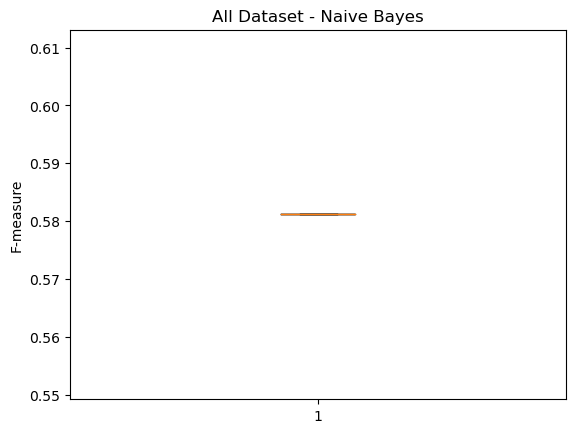

all_data          QDA                0.33            0.59            0.58            0.33            6.9905         


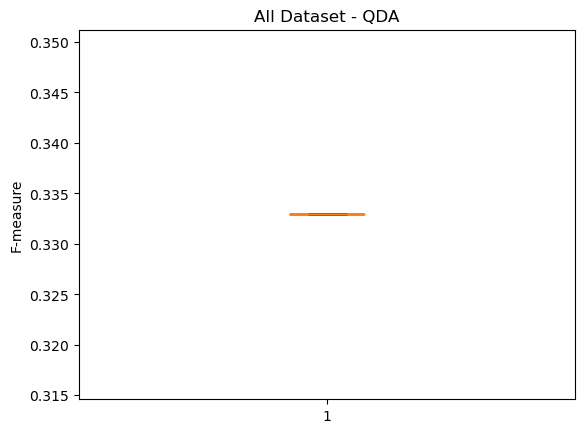

all_data          ID3                0.94            0.94            0.87            0.9             21.2094        


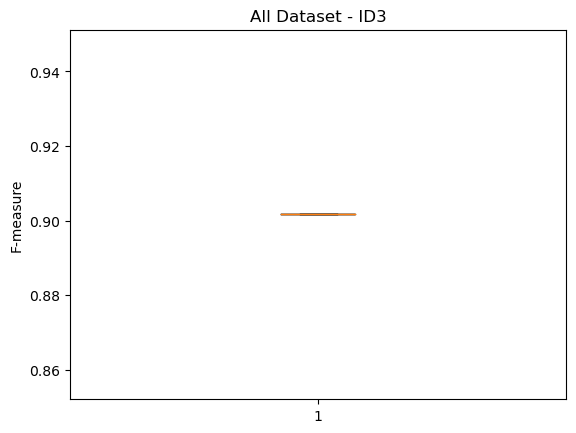

all_data          AdaBoost           0.94            0.95            0.86            0.9             359.1231       


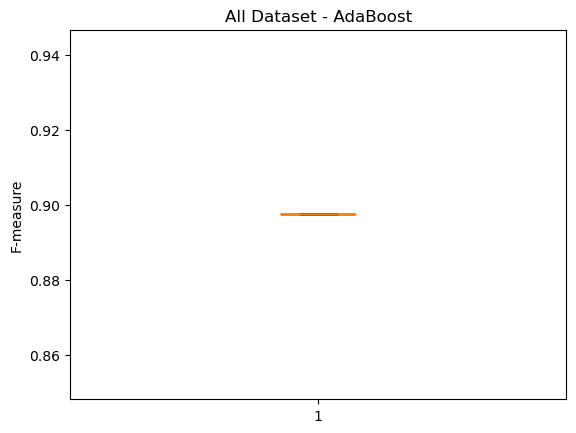

In [ ]:
##  "all_data.csv" file is required for the operation of the program.
##  "all_data.csv" file must be located in the same directory as the program.

##  the purpose of this program is to apply machine learning algorithms to the dataset and observe the performance of algorithms.
##  the algorithms used are:Naive Bayes, QDA, Random Forest, ID3, AdaBoost, MLP, Nearest Neighbors
##  As the program display output data include: file name, machine learning algorithm name, accuracy,Precision, Recall, F1-score,Time
##  the program will create a CSV file that prints the results and a folder containing graphics.

##  the some codes parts used for calculation and graphing are taken from the following site.
##  http://scikit-learn.org


from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



            
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
import pickle
warnings.filterwarnings("ignore")


result="./results/results_2.csv" #a CSV file is named in which the results are saved.
csv_files=["all_data.csv"]# CSV files names: #The names of the dataset files (csv_files).
path=""
repetition=10


def folder(f_name): #this function creates a folder named "results" and "result_graph_1" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

folder_name="./results/"
folder(folder_name)
folder_name="./models/"
folder(folder_name)
folder_name="./results/result_graph_2/"
folder(folder_name)


#The machine learning algorithms to be used are defined in a dictionary (ml_list).
ml_list={
"Naive Bayes":GaussianNB(),
"QDA":QDA(),
"ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
"AdaBoost":AdaBoostClassifier(),
#"MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
"Nearest Neighbors":KNeighborsClassifier(3)}



# the features to be used for each attack type is defined in a dictionary(features).
# the first 4 of the features created by the file "04_1_feature_selection_for_attack_files.py" are used here.
### The set of features to be used consists of combining the 4 features with the highest importance-weight achieved for each attack in approach 1 under a single roof.
### Thus, 4 features are obtained from each of the 12 attack types, resulting in a pool of features consisting of 48 attributes.
### After the repetitions are removed, the number of features is 18. The list of these features can be seen in below : ()

features={"all_data":["Bwd Packet Length Max","Bwd Packet Length Mean","Bwd Packet Length Std","Flow Bytes/s",
"Flow Duration","Flow IAT Max","Flow IAT Mean","Flow IAT Min","Flow IAT Std","Fwd IAT Total","Fwd Packet Length Max",
"Fwd Packet Length Mean","Fwd Packet Length Min","Fwd Packet Length Std","Total Backward Packets","Total Fwd Packets",
"Total Length of Bwd Packets","Total Length of Fwd Packets","Label"]}

seconds=time.time()#time stamp for all processing time






with open(result, "w", newline="",encoding="utf-8") as f:#a CSV file is created to save the results obtained.
    wrt = csv.writer(f)
    wrt.writerow(["File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"])




for j in csv_files: #this loop runs on the list containing the filenames.Operations are repeated for all attack files
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"))# print output header   
    feature_list=list(features[j[0:-4]])
    df=pd.read_csv(path+j,usecols=feature_list)#read an attack file.
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]: #it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    
    y = df["Label"] #this section separates the label and the data into two separate pieces, as Label=y Data=X 
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    
    for ii in ml_list: #this loop runs on the list containing the machine learning algorithm names. Operations are repeated for all the 7 algorithm
        clf = ml_list[ii]
        precision=[]
        recall=[]
        f1=[]
        accuracy=[]
        t_time=[]
        for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
            second=time.time()#time stamp for processing time

            # cross-validation
            X_train, X_test, y_train, y_test = train_test_split(X, y,#  data (X) and labels (y) are divided into 2 parts to be sent to the machine learning algorithm (80% train,%20 test). 
                test_size = 0.20, random_state = repetition)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).


            #machine learning algorithm is applied in this section
            clf = ml_list[ii]#choose algorithm from ml_list dictionary                                                                          
            clf.fit(X_train, y_train)
            predict =clf.predict(X_test)
        
            #makes "classification report" and assigns the precision, f-measure, and recall values.s.    
            

            f_1=f1_score(y_test, predict, average='macro')
            pr=precision_score(y_test, predict, average='macro')
            rc=recall_score(y_test, predict, average='macro')
            
            
            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time()-second)) )



            
        print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],ii,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)), 
            str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))#the result of the ten repetitions is printed on the screen.

        with open(result, "a", newline="",encoding="utf-8") as f: # all the values found are saved in the opened file.
            wrt = csv.writer(f)
            for i in range(0,len(t_time)):
                wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])#file name, algorithm name, precision, recall and f-measure are writed in CSV file
        f_path = "./models/"
        file_name = os.path.join(f_path, "All_data_" + ii + ".pkl")
        # Save the classifier using pickle
        with open(file_name, "wb") as file:
            pickle.dump(clf, file)
     # In this section, Box graphics are created for the results of machine learning algorithms and saved in the feaure_graph folder.
        plt.boxplot(f1)
        plt.title("All Dataset - " +str(ii))
        plt.ylabel('F-measure')
        plt.savefig(folder_name+j[0:-4]+str(ii)+".pdf",bbox_inches='tight', orientation = 'portrait', format = 'pdf')
        plt.show()# you can remove the # sign if you want to see the graphics simultaneously

print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")


In [10]:
import pickle

f_path = "./models/"
model_name = "All_data_AdaBoost.pkl"

try:
    # Attempt to load the model
    with open(f_path + model_name, "rb") as model_file:
        model = pickle.load(model_file)
        print("Model loaded successfully!")

except FileNotFoundError:
    # Handle the case where the file is not found
    print(f"Error: Model file {model_name} not found in directory {f_path}")

# Rest of your code...
features = {
    "all_data": ["Bwd Packet Length Max", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s",
                 "Flow Duration", "Flow IAT Max", "Flow IAT Mean", "Flow IAT Min", "Flow IAT Std", "Fwd IAT Total",
                 "Fwd Packet Length Max", "Fwd Packet Length Mean", "Fwd Packet Length Min", "Fwd Packet Length Std",
                 "Total Backward Packets", "Total Fwd Packets", "Total Length of Bwd Packets",
                 "Total Length of Fwd Packets", "Label"]
}


Model loaded successfully!


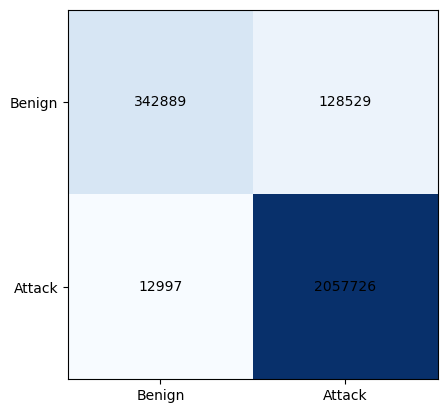

In [12]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class MLApp:
    def __init__(self, root):
        self.root = root
        self.root.title("ML Model Prediction")

        self.file_path_label = tk.Label(root, text="CSV File Path:")
        self.file_path_label.pack()

        self.file_path_entry = tk.Entry(root)
        self.file_path_entry.pack()

        self.browse_button = tk.Button(root, text="Browse", command=self.browse_file)
        self.browse_button.pack()

        self.predict_button = tk.Button(root, text="Predict", command=self.predict)
        self.predict_button.pack()

        self.result_label = tk.Label(root, text="")
        self.result_label.pack()

        self.graph_canvas = tk.Canvas(root)
        self.graph_canvas.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        self.file_path_entry.delete(0, tk.END)
        self.file_path_entry.insert(0, file_path)

    def predict(self):
        file_path = self.file_path_entry.get()

        try:
            # Modified code for reading an attack file
            df = pd.read_csv(file_path, usecols=features["all_data"])
            df = df.fillna(0)
            
            attack_or_not = [1 if label == "BENIGN" else 0 for label in df["Label"]]
            df["Label"] = attack_or_not

            y = df["Label"]
            del df["Label"]
            
            X = df[features["all_data"][:-1]]  # Removing "Label" from features
            
            X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

            # Assuming the model is already loaded (as in the previous code)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y, model.predict(X))
            confusion_mat = confusion_matrix(y, model.predict(X))

            self.result_label.config(text=f"Accuracy: {accuracy:.2f}")
            self.plot_confusion_matrix(confusion_mat)

        except Exception as e:
            self.result_label.config(text=f"Error: {str(e)}")

    def plot_confusion_matrix(self, confusion_matrix):
        labels = ['Benign', 'Attack']
        fig, ax = plt.subplots()
        im = ax.imshow(confusion_matrix, cmap='Blues')

        ax.set_xticks(range(len(labels)))
        ax.set_yticks(range(len(labels)))
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)

        for i in range(len(labels)):
            for j in range(len(labels)):
                text = ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')

        canvas = FigureCanvasTkAgg(fig, master=self.graph_canvas)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

if __name__ == "__main__":
    root = tk.Tk()
    app = MLApp(root)
    root.mainloop()


In [20]:
import pickle

f_path = "./models/"
model_name = "DDOS_Nearest Neighbors.pkl"

try:
    # Attempt to load the model
    with open(f_path + model_name, "rb") as model_file:
        model = pickle.load(model_file)
        print("Model loaded successfully!")

except FileNotFoundError:
    # Handle the case where the file is not found
    print(f"Error: Model file {model_name} not found in directory {f_path}")

features={"Bot":["Bwd Packet Length Mean","Flow IAT Max","Flow Duration","Flow IAT Min","Label"],
"DDoS":["Bwd Packet Length Std","Total Backward Packets","Fwd IAT Total","Flow Duration","Label"],
"DoS GoldenEye":["Flow IAT Max","Bwd Packet Length Std","Flow IAT Min","Total Backward Packets","Label"],
"DoS Hulk":["Bwd Packet Length Std","Fwd Packet Length Std","Fwd Packet Length Max","Flow IAT Min","Label"],
"DoS Slowhttptest":["Flow IAT Mean","Fwd Packet Length Min","Bwd Packet Length Mean","Total Length of Bwd Packets","Label"],
"DoS slowloris":["Flow IAT Mean","Total Length of Bwd Packets","Bwd Packet Length Mean","Total Fwd Packets","Label"],
"FTP-Patator":["Fwd Packet Length Max","Fwd Packet Length Std","Fwd Packet Length Mean","Bwd Packet Length Std","Label"],
"Heartbleed":["Total Backward Packets","Fwd Packet Length Max","Flow IAT Min","Bwd Packet Length Max","Label"],
"PortScan":["Flow Bytes/s","Total Length of Fwd Packets","Fwd IAT Total","Flow Duration","Label"],
"SSH-Patator":["Fwd Packet Length Max","Flow Duration","Flow IAT Max","Total Length of Fwd Packets","Label"],
"Web Attack":["Bwd Packet Length Std","Total Length of Fwd Packets","Flow Bytes/s","Flow IAT Max","Label"],
"all_data": ["Bwd Packet Length Max", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s","Flow Duration", "Flow IAT Max", "Flow IAT Mean", "Flow IAT Min", "Flow IAT Std", "Fwd IAT Total",
                 "Fwd Packet Length Max", "Fwd Packet Length Mean", "Fwd Packet Length Min", "Fwd Packet Length Std",
                 "Total Backward Packets", "Total Fwd Packets", "Total Length of Bwd Packets",
                 "Total Length of Fwd Packets", "Label"]}

Model loaded successfully!


C:\Users\Irfan Arshad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Irfan Arshad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

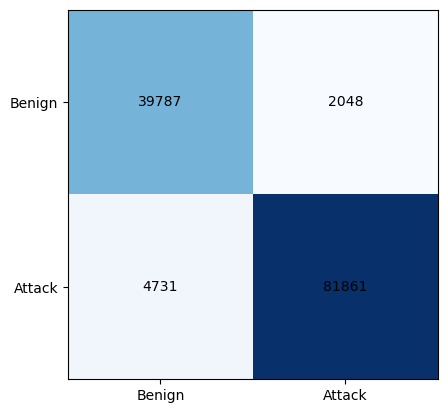

In [18]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class MLApp:
    def __init__(self, root):
        self.root = root
        self.root.title("ML Model Prediction")

        self.file_path_label = tk.Label(root, text="CSV File Path:")
        self.file_path_label.pack()

        self.file_path_entry = tk.Entry(root)
        self.file_path_entry.pack()

        self.browse_button = tk.Button(root, text="Browse", command=self.browse_file)
        self.browse_button.pack()

        self.predict_button = tk.Button(root, text="Predict", command=self.predict)
        self.predict_button.pack()

        self.result_label = tk.Label(root, text="")
        self.result_label.pack()

        self.graph_canvas = tk.Canvas(root)
        self.graph_canvas.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(filetypes=[("*.csv")])
        self.file_path_entry.delete(0, tk.END)
        self.file_path_entry.insert(0, file_path)

    def predict(self):
        file_path = self.file_path_entry.get()

        try:
            # Modified code for reading an attack file
            df = pd.read_csv(file_path, usecols=features["DDoS"])
            df = df.fillna(0)
            
            attack_or_not = [1 if label == "BENIGN" else 0 for label in df["Label"]]
            df["Label"] = attack_or_not

            y = df["Label"]
            del df["Label"]
            
            X = df[features["DDoS"][:-1]]  # Removing "Label" from features
            
            X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

            # Assuming the model is already loaded (as in the previous code)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y, model.predict(X))
            confusion_mat = confusion_matrix(y, model.predict(X))

            self.result_label.config(text=f"Accuracy: {accuracy:.2f}")
            self.plot_confusion_matrix(confusion_mat)

        except Exception as e:
            self.result_label.config(text=f"Error: {str(e)}")

    def plot_confusion_matrix(self, confusion_matrix):
        labels = ['Benign', 'Attack']
        fig, ax = plt.subplots()
        im = ax.imshow(confusion_matrix, cmap='Blues')

        ax.set_xticks(range(len(labels)))
        ax.set_yticks(range(len(labels)))
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)

        for i in range(len(labels)):
            for j in range(len(labels)):
                text = ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')

        canvas = FigureCanvasTkAgg(fig, master=self.graph_canvas)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

if __name__ == "__main__":
    root = tk.Tk()
    app = MLApp(root)
    root.mainloop()


AdaBoostClassifier() Model loaded successfully!
KNeighborsClassifier(n_neighbors=3) Model loaded successfully!


C:\Users\Irfan Arshad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Irfan Arshad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

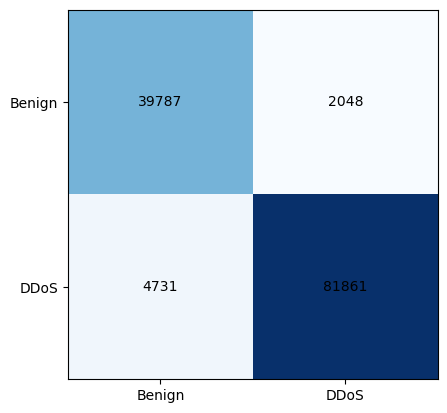

In [35]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class MLApp:
    def __init__(self, root):
        self.root = root
        self.root.title("ML Model Prediction")

        # Features for different attack types
        self.features = {
            "Bot": ["Bwd Packet Length Mean", "Flow IAT Max", "Flow Duration", "Flow IAT Min", "Label"],
            "DDoS": ["Bwd Packet Length Std", "Total Backward Packets", "Fwd IAT Total", "Flow Duration", "Label"],
            "DoS GoldenEye": ["Flow IAT Max", "Bwd Packet Length Std", "Flow IAT Min", "Total Backward Packets", "Label"],
            "DoS Hulk": ["Bwd Packet Length Std", "Fwd Packet Length Std", "Fwd Packet Length Max", "Flow IAT Min", "Label"],
            "DoS Slowhttptest": ["Flow IAT Mean", "Fwd Packet Length Min", "Bwd Packet Length Mean", "Total Length of Bwd Packets", "Label"],
            "DoS slowloris": ["Flow IAT Mean", "Total Length of Bwd Packets", "Bwd Packet Length Mean", "Total Fwd Packets", "Label"],
            "FTP-Patator": ["Fwd Packet Length Max", "Fwd Packet Length Std", "Fwd Packet Length Mean", "Bwd Packet Length Std", "Label"],
            "Heartbleed": ["Total Backward Packets", "Fwd Packet Length Max", "Flow IAT Min", "Bwd Packet Length Max", "Label"],
            "PortScan": ["Flow Bytes/s", "Total Length of Fwd Packets", "Fwd IAT Total", "Flow Duration", "Label"],
            "SSH-Patator": ["Fwd Packet Length Max", "Flow Duration", "Flow IAT Max", "Total Length of Fwd Packets", "Label"],
            "Web Attack": ["Bwd Packet Length Std", "Total Length of Fwd Packets", "Flow Bytes/s", "Flow IAT Max", "Label"],
            "All_data": ["Bwd Packet Length Max", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Duration",
                         "Flow IAT Max", "Flow IAT Mean", "Flow IAT Min", "Flow IAT Std", "Fwd IAT Total",
                         "Fwd Packet Length Max", "Fwd Packet Length Mean", "Fwd Packet Length Min", "Fwd Packet Length Std",
                         "Total Backward Packets", "Total Fwd Packets", "Total Length of Bwd Packets",
                         "Total Length of Fwd Packets", "Label"]
        }
        self.ml_list={
            "Naive Bayes",
            "QDA",
            "ID3",
            "AdaBoost",
            "MLP",
            "Nearest Neighbors"}

        # Attack types dropdown
        self.attack_var = tk.StringVar(root)
        self.attack_var.set("Bot")  # Default attack type
        self.attack_dropdown = tk.OptionMenu(root, self.attack_var, *self.features.keys())
        tk.Label(root, text="Select Attack Type:").pack()
        self.attack_dropdown.pack()

        # ML algorithms dropdown
        self.algorithm_var = tk.StringVar(root)
        self.algorithm_var.set("AdaBoost")  # Default algorithm
        self.algorithm_dropdown = tk.OptionMenu(root, self.algorithm_var, *self.ml_list)  # Add more algorithms as needed
        tk.Label(root, text="Select ML Algorithm:").pack()
        self.algorithm_dropdown.pack()

        # File path entry
        tk.Label(root, text="CSV File Path:").pack()
        self.file_path_entry = tk.Entry(root)
        self.file_path_entry.pack()

        # Browse button
        self.browse_button = tk.Button(root, text="Browse", command=self.browse_file)
        self.browse_button.pack()

        # Predict button
        self.predict_button = tk.Button(root, text="Predict", command=self.predict)
        self.predict_button.pack()

        # Result label
        self.result_label = tk.Label(root, text="")
        self.result_label.pack()

        # Graph canvas   
        self.graph_canvas = tk.Canvas(root)
        self.graph_canvas.pack()

        # Initialize Figure and Axis for confusion matrix
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.graph_canvas)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)


    def browse_file(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        self.file_path_entry.delete(0, tk.END)
        self.file_path_entry.insert(0, file_path)

    def predict(self):
        attack_type = self.attack_var.get()
        algorithm = self.algorithm_var.get()
        file_path = self.file_path_entry.get()
        f_path = "./models/"
        model_name = attack_type + "_" + algorithm + ".pkl"

        try:
            # Attempt to load the model
            with open(f_path + model_name, "rb") as model_file:
                model = pickle.load(model_file)
                print(str(model) + " Model loaded successfully!")

        except FileNotFoundError:
            # Handle the case where the file is not found
            print(f"Error: Model file {model_name} not found in directory {f_path}")

        try:
            # Read CSV file based on selected attack type features
            df = pd.read_csv(file_path, usecols=self.features[attack_type])
            df = df.fillna(0)

            # Convert labels to binary
            attack_or_not = [1 if label == "BENIGN" else 0 for label in df["Label"]]
            df["Label"] = attack_or_not

            y = df["Label"]
            del df["Label"]

            X = df[self.features[attack_type][:-1]]  # Removing "Label" from features

            X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

            # Assuming the model is already loaded (as in the previous code)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y, model.predict(X))
            confusion_mat = confusion_matrix(y, model.predict(X))

            self.result_label.config(text=f"Accuracy: {accuracy:.2f}")
            self.plot_confusion_matrix(confusion_mat)

        except Exception as e:
            self.result_label.config(text=f"Error: {str(e)}")

    def plot_confusion_matrix(self, confusion_matrix):
        labels = ['Benign', self.attack_var.get()]

        # Clear the previous figure
        self.ax.clear()

        im = self.ax.imshow(confusion_matrix, cmap='Blues')

        self.ax.set_xticks(range(len(labels)))
        self.ax.set_yticks(range(len(labels)))
        self.ax.set_xticklabels(labels)
        self.ax.set_yticklabels(labels)

        for i in range(len(labels)):
            for j in range(len(labels)):
                text = self.ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')

        # Redraw the canvas
        self.canvas.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = MLApp(root)
    root.mainloop()

